In [94]:
import pandas as pd
import numpy as np

In [95]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [96]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [97]:
df=df[['v1','v2']]

In [98]:
df=df.rename(columns={'v1':'state','v2':'Message'})

In [99]:
df['state'].nunique()

2

In [100]:
df

,state,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [101]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [102]:
df['state']=encoder.fit_transform(df['state'])
#ham=0
#spam=1

In [103]:
df.duplicated().sum()

403

In [104]:
df=df.drop_duplicates(keep='first')

In [105]:
df

,state,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## EDA

In [106]:
df['state'].value_counts()

0    4516
1     653
Name: state, dtype: int64

([<matplotlib.patches.Wedge at 0x19cccd45720>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'Ham'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

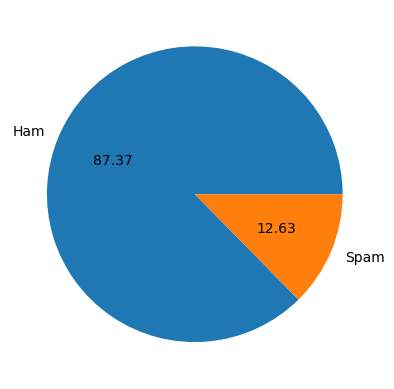

In [107]:
import matplotlib.pyplot as plt
plt.pie(df['state'].value_counts(),labels=['Ham','Spam'],autopct='%0.2f')

In [108]:
import nltk

In [109]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vicky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [110]:
df['Num_character']=df['Message'].apply(len)

C:\Users\vicky\AppData\Local\Temp\ipykernel_1300\4061165268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num_character']=df['Message'].apply(len)


In [111]:
df

,state,Message,Num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [112]:
df['no of words']=df['Message'].apply(lambda x :len( nltk.word_tokenize(x)))

C:\Users\vicky\AppData\Local\Temp\ipykernel_1300\123399629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no of words']=df['Message'].apply(lambda x :len( nltk.word_tokenize(x)))


In [113]:
df['no of sent']=df['Message'].apply(lambda x :len( nltk.sent_tokenize(x)))

C:\Users\vicky\AppData\Local\Temp\ipykernel_1300\2496818561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no of sent']=df['Message'].apply(lambda x :len( nltk.sent_tokenize(x)))


In [114]:
df

,state,Message,Num_character,no of words,no of sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [115]:
df[['Num_character' , 'no of words' , 'no of sent']].describe()

,Num_character,no of words,no of sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [116]:
#ham
df[df["state"]==0][['Num_character' , 'no of words' , 'no of sent']].describe()

,Num_character,no of words,no of sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [117]:
#spam
df[df["state"]==1][['Num_character' , 'no of words' , 'no of sent']].describe()

,Num_character,no of words,no of sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [118]:
import seaborn as sns

<Axes: xlabel='Num_character', ylabel='Count'>

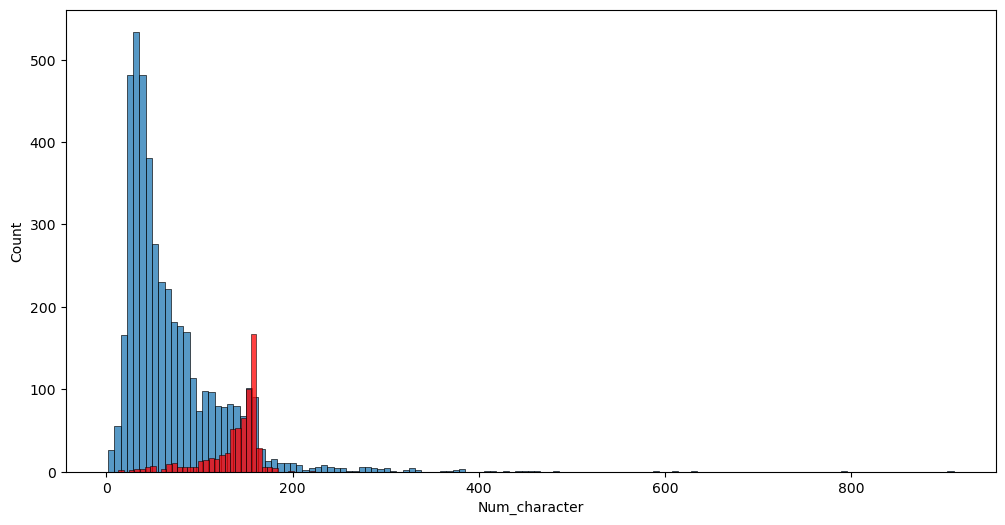

In [119]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["state"]==0]['Num_character'])
sns.histplot(df[df["state"]==1]['Num_character'],color="red")

<Axes: xlabel='no of words', ylabel='Count'>

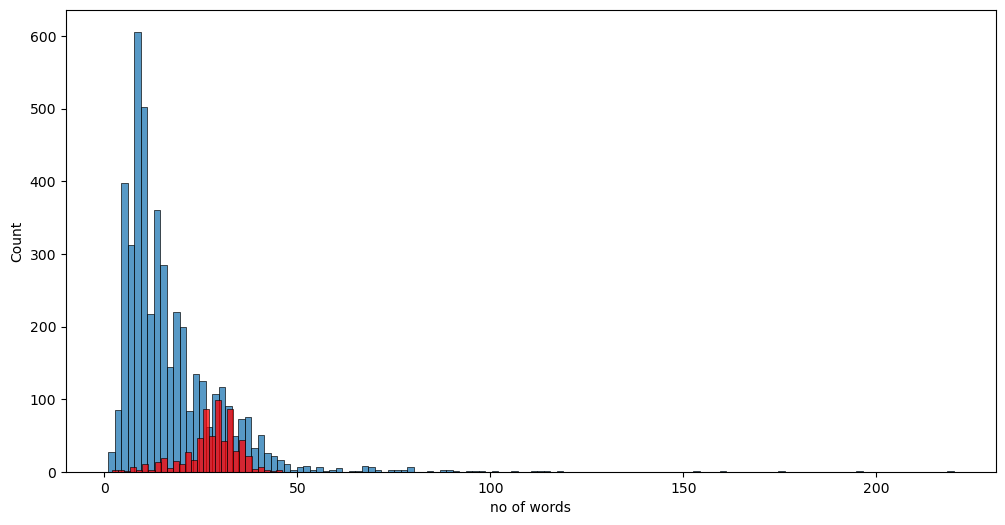

In [120]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["state"]==0]['no of words'])
sns.histplot(df[df["state"]==1]['no of words'],color="red")

<Axes: xlabel='no of sent', ylabel='Count'>

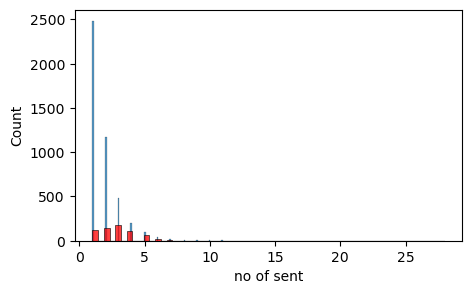

In [121]:
plt.figure(figsize=(5,3))
sns.histplot(df[df["state"]==0]['no of sent'])
sns.histplot(df[df["state"]==1]['no of sent'],color="red")

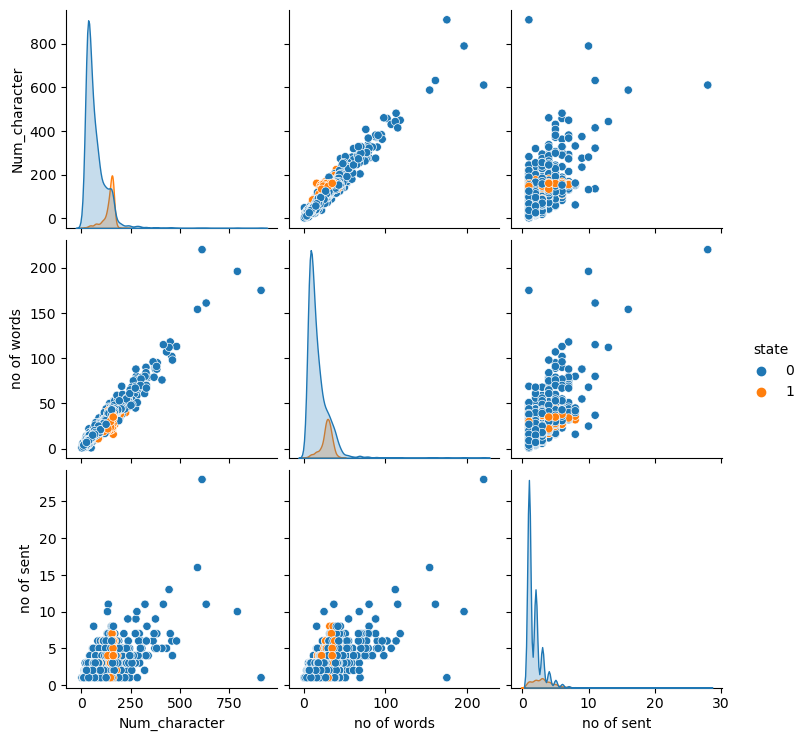

In [122]:
sns.pairplot(df,hue='state')

In [123]:
df.corr()

C:\Users\vicky\AppData\Local\Temp\ipykernel_1300\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,state,Num_character,no of words,no of sent
state,1.000000,0.384717,0.262984,0.284901
Num_character,0.384717,1.000000,0.965770,0.638143
no of words,0.262984,0.965770,1.000000,0.684541
no of sent,0.284901,0.638143,0.684541,1.000000


C:\Users\vicky\AppData\Local\Temp\ipykernel_1300\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

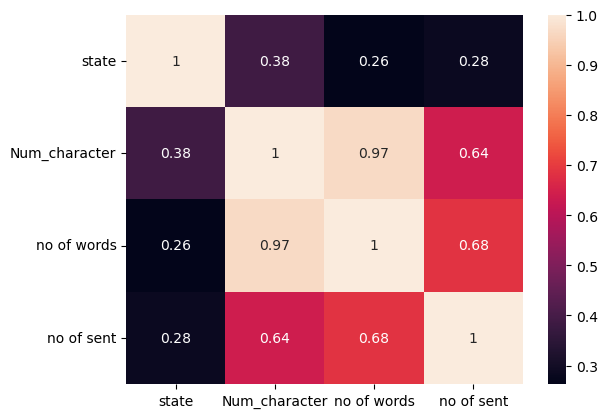

In [124]:
sns.heatmap(df.corr(),annot=True)

## Data PrePocessing
                 lower case
                 tokenization
                 removing special character,
                 removing stop word and puncuation,
                 steaming

In [125]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vicky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [126]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [127]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [128]:
def text_transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
        
    return " ".join(y)

In [129]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("dance")

'danc'

In [130]:
df['tarnsformed text']=df['Message'].apply(text_transform)

C:\Users\vicky\AppData\Local\Temp\ipykernel_1300\1587199077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tarnsformed text']=df['Message'].apply(text_transform)


In [131]:
df

,state,Message,Num_character,no of words,no of sent,tarnsformed text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [132]:
from wordcloud import WordCloud
wc=WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [133]:
spam_sm=wc.generate(df[df['state']==1]['tarnsformed text'].str.cat(sep=' '))

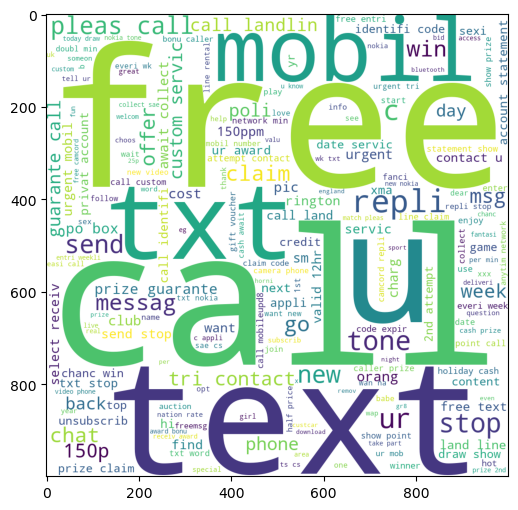

In [134]:
plt.figure(figsize=(15,6))
plt.imshow(spam_sm)

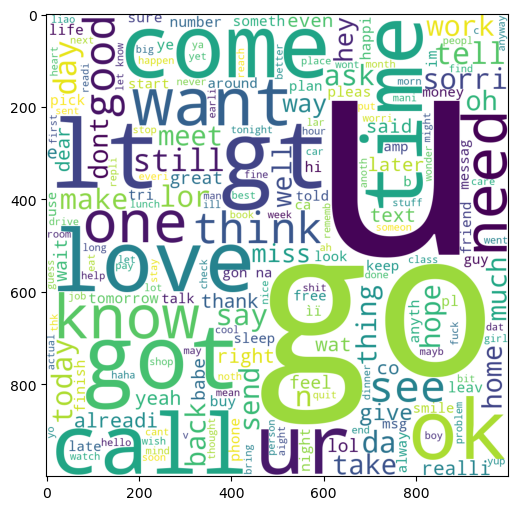

In [135]:
ham_sm=wc.generate(df[df['state']==0]['tarnsformed text'].str.cat(sep=' '))
plt.figure(figsize=(15,6))
plt.imshow(ham_sm)

In [136]:
df.head()

,state,Message,Num_character,no of words,no of sent,tarnsformed text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [137]:
spam_corpus=[]
for msg in df[df['state']==1]['tarnsformed text']:
    for word in msg.split():
        msg_corpus.append(word)

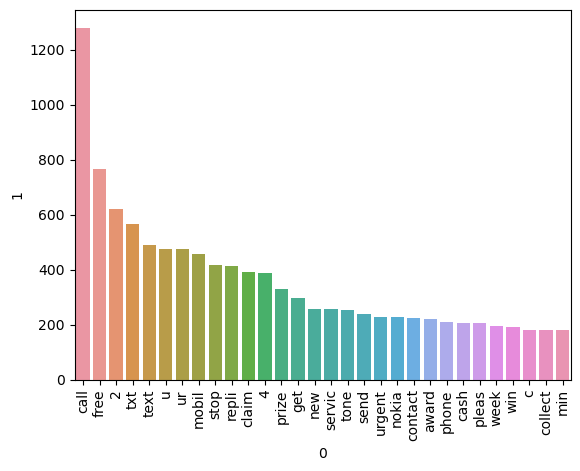

In [138]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(msg_corpus).most_common(30))[0],y=pd.DataFrame(Counter(msg_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [139]:
ham_corpus=[]
for msg in df[df['state']==0]['tarnsformed text']:
    for word in msg.split():
        ham_corpus.append(word)

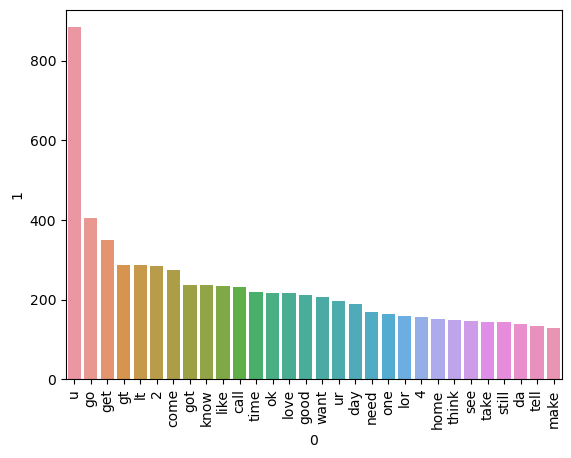

In [140]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Selection

In [192]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [193]:
x=tfidf.fit_transform(df['tarnsformed text']).toarray()

In [194]:
x.shape

(5169, 3000)

In [195]:
y=df['state'].values

In [196]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [197]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [198]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1)*100)
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

86.94390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [199]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2)*100)
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

97.09864603481626
[[896   0]
 [ 30 108]]
1.0


In [200]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3)*100)
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

98.35589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [201]:
#tfidf with mnb

In [203]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(tfidf,open('model.pkl','wb'))